<a href="https://colab.research.google.com/github/FilipKatulski/international-capital-investments/blob/main/dax_etf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAX ETF oraz DAX - opracowanie 

Wykonał: Filip Katulski


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


## Wyliczenie stopy zwrotu

In [ ]:
df_dax = pd.read_csv("ETFDAX_oraz_DAX.csv", sep=";",parse_dates=["DateTime"]).dropna()

df_dax.head()

,DateTime,ETF,DAX
0,2011-05-31,282.43,28849.46
1,2011-06-01,279.75,28577.41
2,2011-06-02,274.67,28059.50
3,2011-06-03,275.45,28138.96
4,2011-06-06,274.52,28044.98


In [ ]:
# df_dax["DAX"] = df_dax["DAX"].str.replace(",", ".").astype(float)
# df_dax["ETF"] = df_dax["ETF"].str.replace(",", ".").astype(float)

In [ ]:
df_dax.head()

,DateTime,ETF,DAX
0,2011-05-31,282.43,28849.46
1,2011-06-01,279.75,28577.41
2,2011-06-02,274.67,28059.50
3,2011-06-03,275.45,28138.96
4,2011-06-06,274.52,28044.98


In [ ]:
df_dax["ETF_return_val"] = df_dax['ETF'].pct_change(1)  # watch out the 'direction' of DateTime
df_dax["DAX_return_val"] = df_dax['DAX'].pct_change(1)
df_dax.head()

,DateTime,ETF,DAX,ETF_return_val,DAX_return_val
0,2011-05-31,282.43,28849.46,NaN,NaN
1,2011-06-01,279.75,28577.41,-0.009489,-0.009430
2,2011-06-02,274.67,28059.50,-0.018159,-0.018123
3,2011-06-03,275.45,28138.96,0.002840,0.002832
4,2011-06-06,274.52,28044.98,-0.003376,-0.003340


In [ ]:

df_dax_weekly = df_dax.groupby(pd.Grouper(key='DateTime', freq='W')).sum() # sumujemy wartości z tygodnia
df_dax_monthly = df_dax.groupby(pd.Grouper(key='DateTime', freq='M')).sum()

In [ ]:
df_dax_weekly.head()

,ETF,DAX,ETF_return_val,DAX_return_val
DateTime,,,,
2011-06-05,1112.30,113625.33,-0.024808,-0.024721
2011-06-12,1370.71,140033.71,-0.010401,-0.010326
2011-06-19,1379.63,140951.99,0.023421,0.023452
2011-06-26,1404.49,143497.60,-0.003077,-0.003014
2011-07-03,1418.35,144919.03,0.031190,0.031160


In [ ]:
df_dax_monthly.head()

,ETF,DAX,ETF_return_val,DAX_return_val
DateTime,,,,
2011-05-31,282.43,28849.46,0.000000,0.000000
2011-06-30,6116.30,624880.69,0.018447,0.018667
2011-07-31,5981.23,611210.65,-0.023568,-0.023221
2011-08-31,5485.54,561065.02,-0.171024,-0.170157
2011-09-30,5032.09,515002.08,0.018607,0.019013


### Wykresy stopy zwrotu

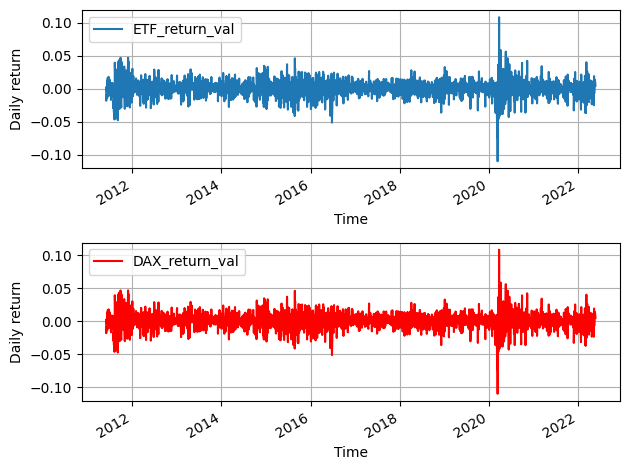

In [ ]:
fig, ax = plt.subplots(2,1)

df_dax.plot(x='DateTime', y='ETF_return_val', grid=True, legend=True, xlabel="Time", ylabel="Daily return", ax=ax[0])
df_dax.plot(x='DateTime', y='DAX_return_val', grid=True, legend=True, xlabel="Time", ylabel="Daily return", color='red', ax=ax[1])
plt.tight_layout()

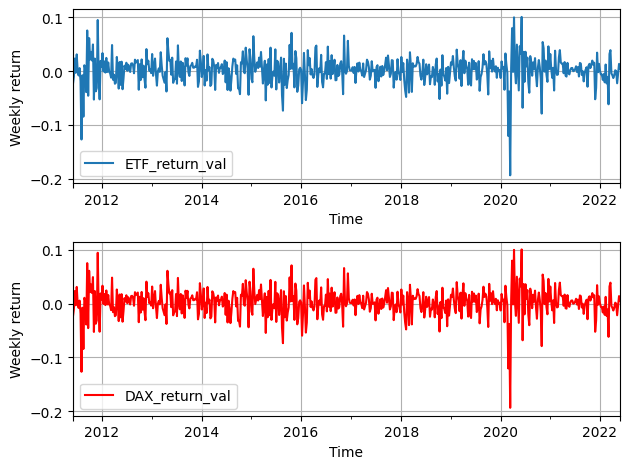

In [ ]:
fig, ax = plt.subplots(2,1)
df_dax_weekly.reset_index().plot(x='DateTime', y='ETF_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Weekly return", ax = ax[0])
df_dax_weekly.reset_index().plot(x='DateTime', y='DAX_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Weekly return", color="red", ax = ax[1])
plt.tight_layout()

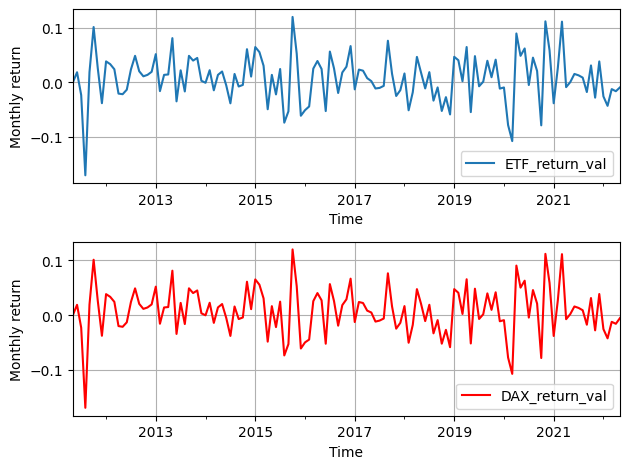

In [ ]:
fig, ax = plt.subplots(2,1)
df_dax_monthly.reset_index().plot(x='DateTime', y='ETF_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Monthly return", ax = ax[0])
df_dax_monthly.reset_index().plot(x='DateTime', y='DAX_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Monthly return", color="red", ax = ax[1])
plt.tight_layout()

## Skumulowane stopy zwrotu

In [ ]:
# expanding window, cumulative product

# formula:  (1+r1)(1+r2)...(1+rn) -1

df_dax['ETF_cum_return_val'] = df_dax['ETF_return_val'].add(1).cumprod() - 1
df_dax['DAX_cum_return_val'] = df_dax['DAX_return_val'].add(1).cumprod() - 1
df_dax.head()


,DateTime,ETF,DAX,ETF_return_val,DAX_return_val,ETF_cum_return_val,DAX_cum_return_val
0,2011-05-31,282.43,28849.46,NaN,NaN,NaN,NaN
1,2011-06-01,279.75,28577.41,-0.009489,-0.009430,-0.009489,-0.009430
2,2011-06-02,274.67,28059.50,-0.018159,-0.018123,-0.027476,-0.027382
3,2011-06-03,275.45,28138.96,0.002840,0.002832,-0.024714,-0.024628
4,2011-06-06,274.52,28044.98,-0.003376,-0.003340,-0.028007,-0.027885


In [ ]:
df_dax_weekly['ETF_cum_return_val'] = df_dax_weekly['ETF_return_val'].add(1).cumprod() - 1
df_dax_weekly['DAX_cum_return_val'] = df_dax_weekly['DAX_return_val'].add(1).cumprod() - 1
df_dax.head()

,DateTime,ETF,DAX,ETF_return_val,DAX_return_val,ETF_cum_return_val,DAX_cum_return_val
0,2011-05-31,282.43,28849.46,NaN,NaN,NaN,NaN
1,2011-06-01,279.75,28577.41,-0.009489,-0.009430,-0.009489,-0.009430
2,2011-06-02,274.67,28059.50,-0.018159,-0.018123,-0.027476,-0.027382
3,2011-06-03,275.45,28138.96,0.002840,0.002832,-0.024714,-0.024628
4,2011-06-06,274.52,28044.98,-0.003376,-0.003340,-0.028007,-0.027885


In [ ]:
df_dax_monthly['ETF_cum_return_val'] = df_dax_monthly['ETF_return_val'].add(1).cumprod() - 1
df_dax_monthly['DAX_cum_return_val'] = df_dax_monthly['DAX_return_val'].add(1).cumprod() - 1
df_dax.head()

,DateTime,ETF,DAX,ETF_return_val,DAX_return_val,ETF_cum_return_val,DAX_cum_return_val
0,2011-05-31,282.43,28849.46,NaN,NaN,NaN,NaN
1,2011-06-01,279.75,28577.41,-0.009489,-0.009430,-0.009489,-0.009430
2,2011-06-02,274.67,28059.50,-0.018159,-0.018123,-0.027476,-0.027382
3,2011-06-03,275.45,28138.96,0.002840,0.002832,-0.024714,-0.024628
4,2011-06-06,274.52,28044.98,-0.003376,-0.003340,-0.028007,-0.027885


### Wykresy skumulowanych stóp zwrotu

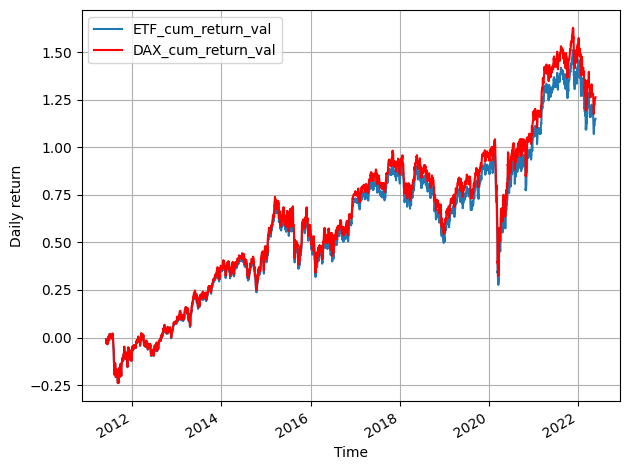

In [ ]:
fig, ax = plt.subplots(1,1)
df_dax.reset_index().plot(x='DateTime', y='ETF_cum_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Daily return", ax = ax)
df_dax.reset_index().plot(x='DateTime', y='DAX_cum_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Daily return", color="red", ax = ax)
plt.tight_layout()

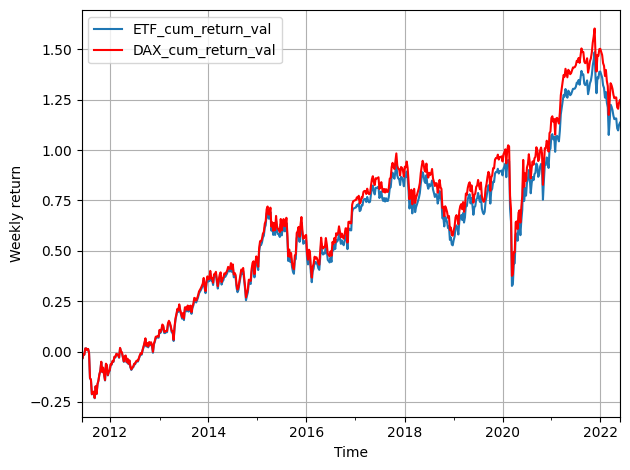

In [ ]:
fig, ax = plt.subplots(1,1)
df_dax_weekly.reset_index().plot(x='DateTime', y='ETF_cum_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Weekly return", ax = ax)
df_dax_weekly.reset_index().plot(x='DateTime', y='DAX_cum_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Weekly return", color="red", ax = ax)
plt.tight_layout()

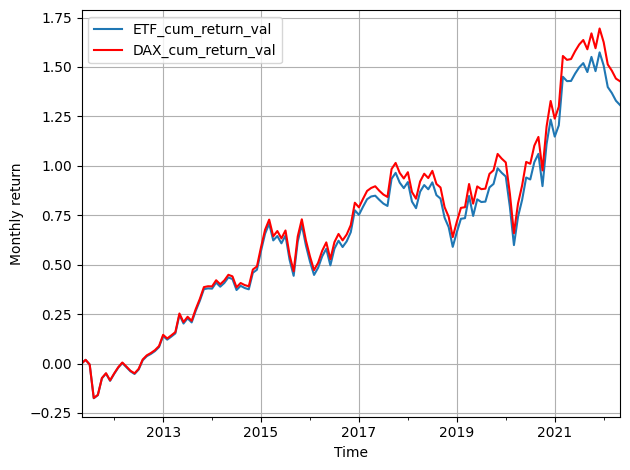

In [ ]:
fig, ax = plt.subplots(1,1)
df_dax_monthly.reset_index().plot(x='DateTime', y='ETF_cum_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Monthly return", ax = ax)
df_dax_monthly.reset_index().plot(x='DateTime', y='DAX_cum_return_val', 
                                 grid=True, legend=True, xlabel="Time", ylabel="Monthly return", color="red", ax = ax)
plt.tight_layout()

## Korelacja cen oraz stóp zwrotu

In [ ]:
df_dax[["ETF", "DAX"]].corr()

,ETF,DAX
ETF,1.000000,0.999663
DAX,0.999663,1.000000


In [ ]:
df_dax[["ETF_return_val","DAX_return_val"]].corr()

,ETF_return_val,DAX_return_val
ETF_return_val,1.000000,0.999973
DAX_return_val,0.999973,1.000000


In [ ]:
df_dax_weekly[["ETF_return_val", "DAX_return_val"]].corr()

,ETF_return_val,DAX_return_val
ETF_return_val,1.000000,0.999971
DAX_return_val,0.999971,1.000000


In [ ]:
df_dax_monthly[["ETF_return_val", "DAX_return_val"]].corr()

,ETF_return_val,DAX_return_val
ETF_return_val,1.000000,0.999905
DAX_return_val,0.999905,1.000000


### Istotność - test Pearsona

In [ ]:
from scipy.stats import pearsonr

In [ ]:
df_dax = df_dax.dropna()
pearsonr(df_dax["ETF_return_val"], df_dax["DAX_return_val"])

PearsonRResult(statistic=0.9999732716704519, pvalue=0.0)

In [ ]:
df_dax_weekly = df_dax_weekly.dropna()
pearsonr(df_dax_weekly["ETF_return_val"], df_dax_weekly["DAX_return_val"])

PearsonRResult(statistic=0.9999705974085197, pvalue=0.0)

In [ ]:
df_dax_monthly = df_dax_monthly.dropna()
pearsonr(df_dax_monthly["ETF_return_val"], df_dax_monthly["DAX_return_val"])

PearsonRResult(statistic=0.9999048600324945, pvalue=1.3848547578058232e-245)

## Test Normalności

Dopasowanie Histogramów

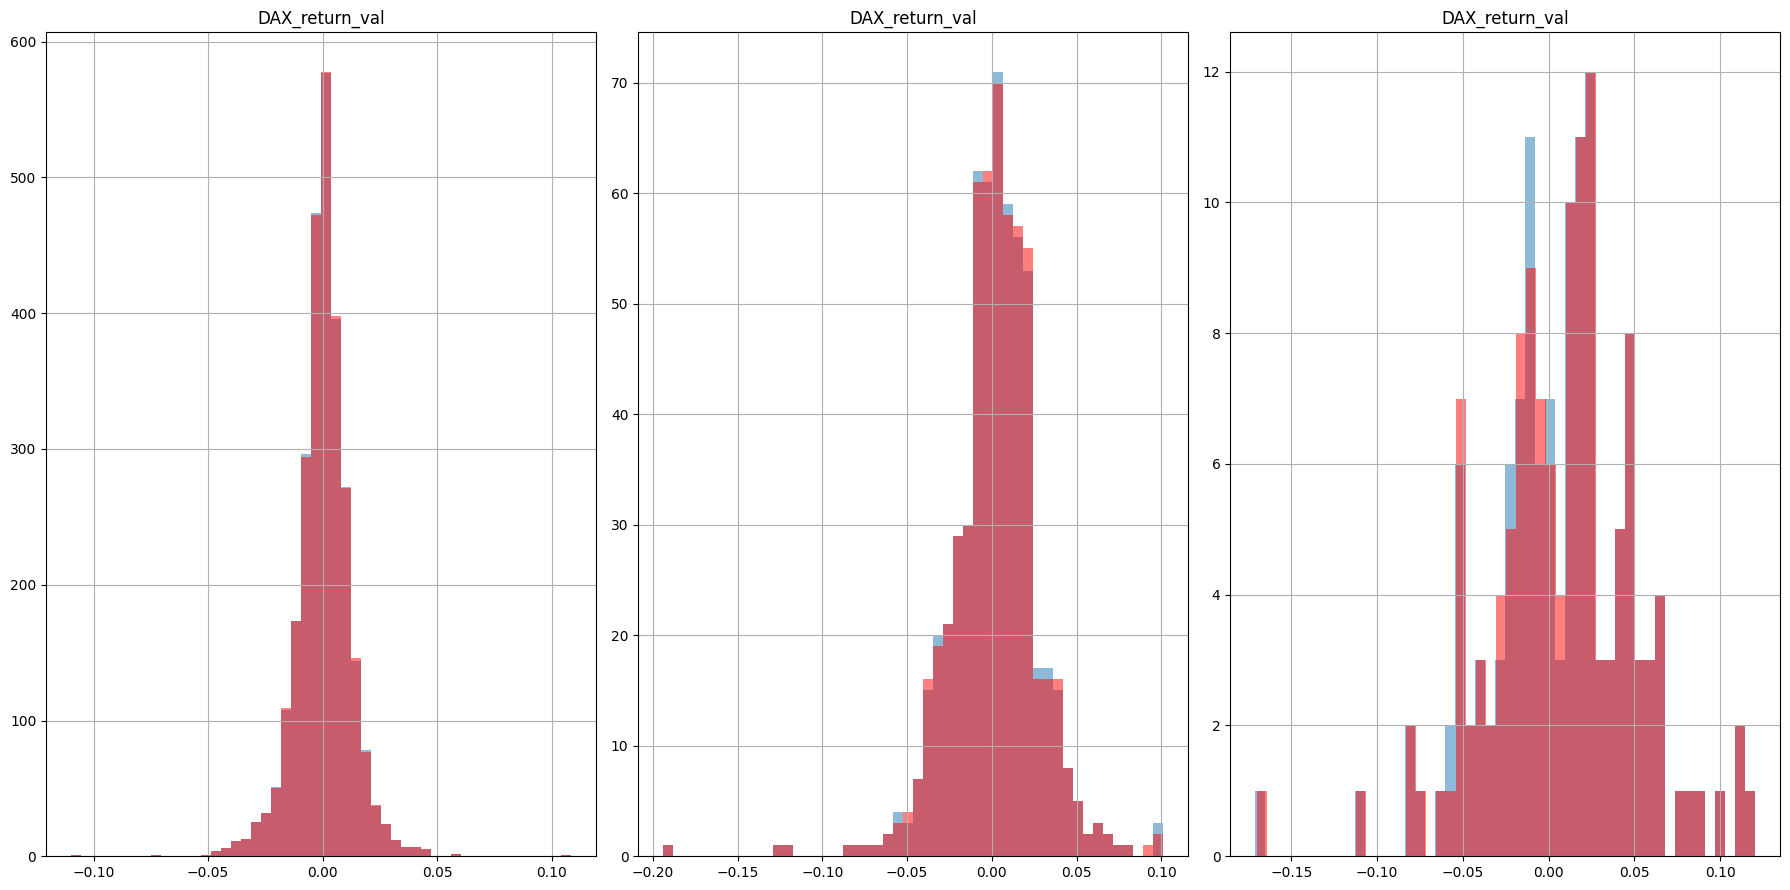

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (18,9))

df_dax.hist('ETF_return_val', bins=50, ax=ax[0], alpha=0.5)
df_dax.hist('DAX_return_val', bins=50, color="red", ax=ax[0], alpha=0.5)

df_dax_weekly.hist('ETF_return_val', bins=50, ax=ax[1], alpha=0.5)
df_dax_weekly.hist('DAX_return_val', bins=50, color="red", ax=ax[1], alpha=0.5)

df_dax_monthly.hist('ETF_return_val', bins=50, ax=ax[2], alpha=0.5)
df_dax_monthly.hist('DAX_return_val', bins=50, color="red", ax=ax[2], alpha=0.5)
plt.tight_layout()

In [ ]:
from scipy.stats import shapiro, jarque_bera

### Test Shapiro

In [ ]:
shapiro_etf_daily = shapiro(df_dax["ETF_return_val"])
shapiro_dax_daily = shapiro(df_dax["DAX_return_val"])

shapiro_etf_weekly = shapiro(df_dax_weekly['ETF_return_val'])
shapiro_dax_weekly = shapiro(df_dax_weekly['DAX_return_val'])

shapiro_etf_monthly = shapiro(df_dax_monthly['ETF_return_val'])
shapiro_dax_monthly = shapiro(df_dax_monthly['DAX_return_val'])

print("Daily ETF:",shapiro_etf_daily, "\nDaily DAX:", shapiro_dax_daily)

print("\nWeekly ETF:", shapiro_etf_weekly, "\nWeekly DAX:", shapiro_dax_weekly)

print("\nMonthly ETF:", shapiro_etf_monthly, "\nMonthly DAX:", shapiro_dax_monthly)

Daily ETF: ShapiroResult(statistic=0.9447004795074463, pvalue=5.5804257422518665e-31) 
Daily DAX: ShapiroResult(statistic=0.9447700381278992, pvalue=5.793968397010945e-31)

Weekly ETF: ShapiroResult(statistic=0.9304185509681702, pvalue=1.1189627105749264e-15) 
Weekly DAX: ShapiroResult(statistic=0.9304185509681702, pvalue=1.1189713926626358e-15)

Monthly ETF: ShapiroResult(statistic=0.9762982726097107, pvalue=0.019993551075458527) 
Monthly DAX: ShapiroResult(statistic=0.9766902327537537, pvalue=0.021883400157094002)


### Test Jarque-Bera

In [ ]:
jarque_bera_etf_daily = jarque_bera(df_dax['ETF_return_val'])
jarque_bera_dax_daily = jarque_bera(df_dax['DAX_return_val'])

jarque_bera_etf_weekly = jarque_bera(df_dax_weekly['ETF_return_val'])
jarque_bera_dax_weekly = jarque_bera(df_dax_weekly['DAX_return_val'])

jarque_bera_etf_monthly = jarque_bera(df_dax_monthly['ETF_return_val'])
jarque_bera_dax_monthly = jarque_bera(df_dax_monthly['DAX_return_val'])

print("Daily ETF:",jarque_bera_etf_daily, "\nDaily DAX:", jarque_bera_dax_daily)

print("\nWeekly ETF:", jarque_bera_etf_weekly, "\nWeekly DAX:", jarque_bera_dax_weekly)

print("\nMonthly ETF:", jarque_bera_etf_monthly, "\nMonthly DAX:", jarque_bera_dax_monthly)


Daily ETF: SignificanceResult(statistic=5711.806123168997, pvalue=0.0) 
Daily DAX: SignificanceResult(statistic=5729.820490020628, pvalue=0.0)

Weekly ETF: SignificanceResult(statistic=1321.2419478096174, pvalue=1.2472583026258454e-287) 
Weekly DAX: SignificanceResult(statistic=1325.6595681939916, pvalue=1.3698793705766268e-288)

Monthly ETF: SignificanceResult(statistic=19.811822089961268, pvalue=4.9878972092121126e-05) 
Monthly DAX: SignificanceResult(statistic=19.442673554937315, pvalue=5.9989753971353095e-05)


### Test Kolmogorova-Smirnova 

In [ ]:
from scipy.stats import kstest, norm

In [ ]:
kolmogorov_smirnov_etf_daily = kstest(df_dax['ETF_return_val'], norm.cdf)
kolmogorov_smirnov_dax_daily = kstest(df_dax['DAX_return_val'], norm.cdf)

kolmogorov_smirnov_etf_weekly = kstest(df_dax_weekly['ETF_return_val'], norm.cdf)
kolmogorov_smirnov_dax_weekly = kstest(df_dax_weekly['DAX_return_val'], norm.cdf)

kolmogorov_smirnov_etf_monthly = kstest(df_dax_monthly['ETF_return_val'], norm.cdf)
kolmogorov_smirnov_dax_monthly = kstest(df_dax_monthly['DAX_return_val'], norm.cdf)

print("Daily ETF:",kolmogorov_smirnov_etf_daily, "\nDaily DAX:", kolmogorov_smirnov_dax_daily)

print("\nWeekly ETF:", kolmogorov_smirnov_etf_weekly, "\nWeekly DAX:", kolmogorov_smirnov_dax_weekly)

print("\nMonthly ETF:", kolmogorov_smirnov_etf_monthly, "\nMonthly DAX:", kolmogorov_smirnov_dax_monthly)

Daily ETF: KstestResult(statistic=0.4802707924159886, pvalue=0.0, statistic_location=0.04219544947326592, statistic_sign=1) 
Daily DAX: KstestResult(statistic=0.48032922623738195, pvalue=0.0, statistic_location=0.04659760365992338, statistic_sign=1)

Weekly ETF: KstestResult(statistic=0.463175091122301, pvalue=2.866393907559179e-113, statistic_location=-0.061776992075861514, statistic_sign=-1) 
Weekly DAX: KstestResult(statistic=0.46315092067713626, pvalue=2.9498182860155126e-113, statistic_location=-0.06183769423206953, statistic_sign=-1)

Monthly ETF: KstestResult(statistic=0.45341233713881274, pvalue=1.7075106291984872e-25, statistic_location=-0.07916691214440919, statistic_sign=-1) 
Monthly DAX: KstestResult(statistic=0.45352733990861593, pvalue=1.655671282347575e-25, statistic_location=-0.07887774148984639, statistic_sign=-1)


## Wnioski

 - W sekcjach poświęconych stopom zwrotu można zauważyć, że ogólnym trendem dla ETF jest jest odzwierciedlanie funkcji stopy zwrotu DAX, jednak nieznacznie pomniejszonej. 
 
 Widać to doskonale na wykresach miesięcznych skumulowanych. Końcowe wyniki dla ETF są mniej więcej o 0.125 mniejsze niż dla DAX.  

 - Ceny DAX i ETF DAX oraz ich stopy zwrotu są skorelowane, o czym świadczą testy na korelację. 

 Obliczony współczynnik Pearsona jest bliski wartości 1, co oznacza niemal liniowe odzwrotowanie, co potwierdza pierwszy wniosek. Dodatkowo p-value jest równa zeru. 

 - Przeprowadzone testy normalności wskazują wysokie dopasowanie do rozkładu normalnego. 

 Test dopasowania Kolmogova Smirnova dopasowuje ETF i DAX do normalnej, skumulowanej dystrybuanty. 
